<a href="https://colab.research.google.com/github/silverho45/DUI-prediction/blob/main/Data_Analysis_for_DUI_Prediction_Mathmatics_and_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음주운전 단속 현황

In [ ]:
# 한글 폰트 설정 (colab version)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [ ]:
# --------세션 재시작----------
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')

# reference : https://teddylee777.github.io/colab/colab-korean/

In [ ]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# 파일 불러오기
df = pd.read_csv("경찰청_음주운전_20231231.csv", encoding="euc-kr")
df.head()

# reference: https://www.data.go.kr/data/15043308/fileData.do

,연번,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서
0,1,남자,1,31,0.136,N,2023-01-01 0:03,수원남부경찰서
1,2,남자,3,56,0.065,N,2023-01-01 0:04,일산동부경찰서
2,3,남자,1,34,0.094,N,2023-01-01 0:06,수원서부경찰서
3,4,남자,1,35,0.191,N,2023-01-01 0:10,분당경찰서
4,5,남자,1,28,0.043,N,2023-01-01 0:13,천안서북경찰서


* **성별 영향 확인**

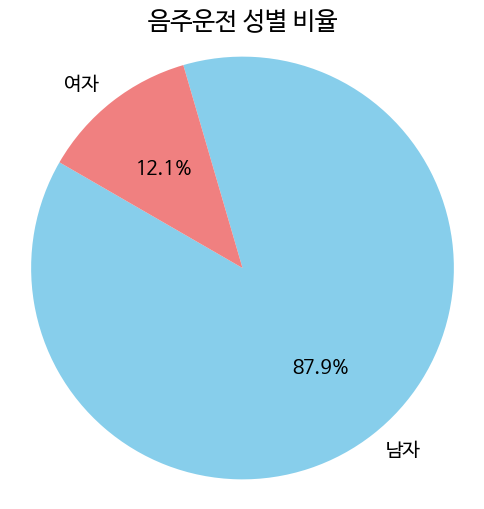

In [ ]:
# 성별 : 남여 기준
df = df[df["성별"].isin(["남자", "여자"])]

gender_counts = df["성별"].value_counts()

# 시각화
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%",
        colors = ["skyblue","lightcoral"], textprops={"fontsize":14}, startangle=150)
plt.title("음주운전 성별 비율", size = 18)
plt.axis("equal")
plt.show()

* **나이대 영향 확인**

<ipython-input-6-35205eed5a62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["나이"] = pd.to_numeric(df["나이"], errors = "coerce")
<ipython-input-6-35205eed5a62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["나이"] = df["나이"].astype(int)
<ipython-input-6-35205eed5a62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

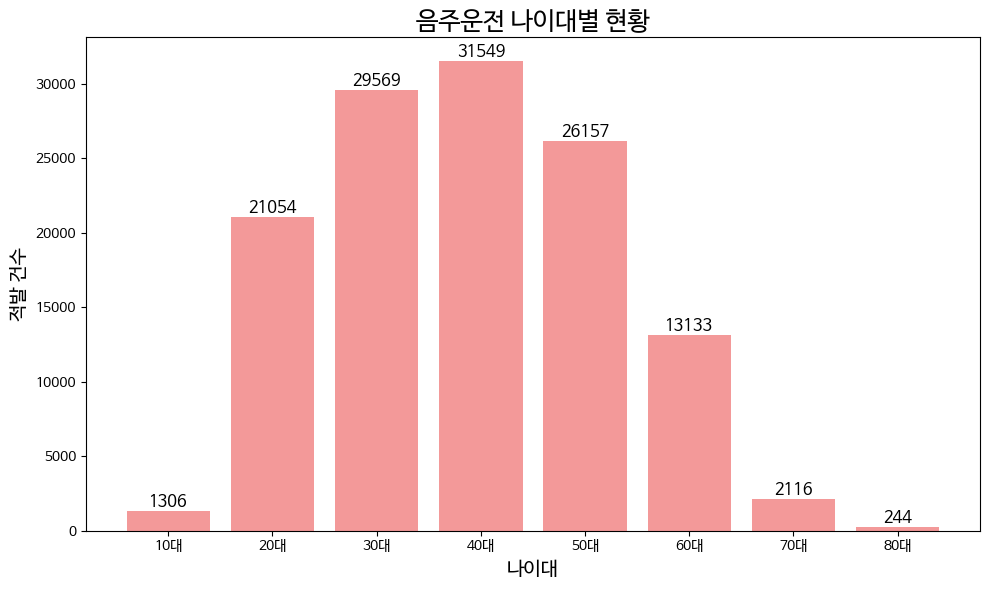

In [ ]:
# 결측치 제거 & 숫자형으로 변환
df["나이"].replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=["나이"])
df["나이"] = pd.to_numeric(df["나이"], errors = "coerce")
df["나이"] = df["나이"].astype(int)

# 나이 구간 설정
bins = [10,20,30,40,50,60,70,80,90]
labels = ["10대","20대","30대","40대","50대","60대","70대","80대"]
df["나이대"] = pd.cut(df["나이"], bins = bins, labels = labels, right = False)

age_counts = df["나이대"].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
bars = plt.bar(age_counts.index, age_counts.values, color = "lightcoral", alpha = 0.8)
plt.title("음주운전 나이대별 현황", size = 18)
plt.xlabel("나이대", size = 14)
plt.ylabel("적발 건수", size = 14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+3, f"{int(height)}", ha="center", va="bottom", size = 12)

plt.tight_layout()
plt.show()

* **전국 지역별 현황**

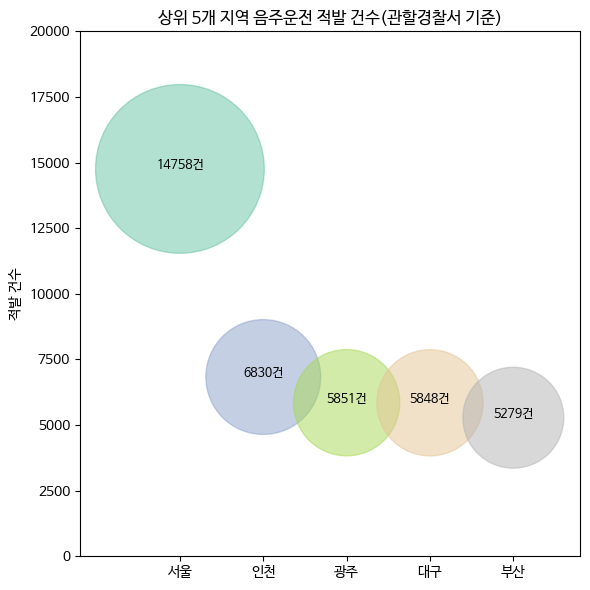

In [ ]:
# 대략적인 지역(행정 구역X) 기준
df["지역"] = df["관할경찰서"].str[:2]

region_counts = df["지역"].value_counts().head()

# 시각화
plt.figure(figsize=(6,6))
plt.scatter(x = region_counts.index, y = region_counts.values,
            s = region_counts.values, alpha = 0.5,
            c = range(len(region_counts)), cmap = "Set2")

for i, (region, count) in enumerate(region_counts.items()):
    plt.text(region, count+5, f"{count}건", ha = "center", size = 9)

plt.title("상위 5개 지역 음주운전 적발 건수(관할경찰서 기준)")
plt.ylabel("적발 건수")
plt.ylim(0,20_000)
x = list(range(len(region_counts)))
plt.xlim(-1.2, len(x) - 0.2)
plt.tight_layout()
plt.show()

* **서울 내 구역별 현황**

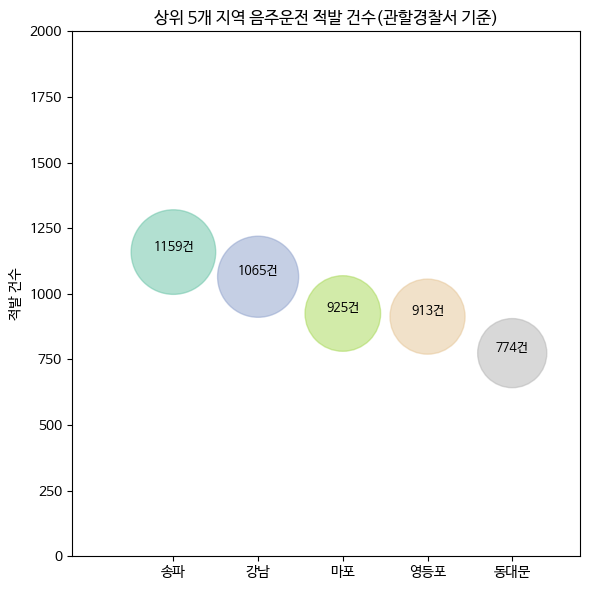

In [ ]:
# 대략적인 지역(행정 구역X) 기준
df_seoul = df[df["관할경찰서"].str.startswith("서울")].copy() # 서울 기준
df_seoul["지역"] = df_seoul["관할경찰서"].str[2:]
df_seoul["지역"] = df_seoul["지역"].str.replace("경찰서","",regex=False)

df["지역"] = df_seoul["관할경찰서"].str[2:]
df["지역"] = df_seoul["지역"].str.replace("경찰서","",regex=False)

region_counts = df_seoul["지역"].value_counts().head()

# 시각화
plt.figure(figsize=(6,6))
plt.scatter(x = region_counts.index, y = region_counts.values,
            s = region_counts.values * 3.2, alpha = 0.5,
            c = range(len(region_counts)), cmap = "Set2")

for i, (region, count) in enumerate(region_counts.items()):
    plt.text(region, count+5, f"{count}건", ha = "center", size = 9)

plt.title("상위 5개 지역 음주운전 적발 건수(관할경찰서 기준)")
plt.ylabel("적발 건수")
plt.ylim(0,2000)
x = list(range(len(region_counts)))
plt.xlim(-1.2, len(x) - 0.2)
plt.tight_layout()
plt.show()

* **시간대별 통계**

In [ ]:
# str --> datetime
df["측정일시"] = pd.to_datetime(df["측정일시"], errors="coerce")

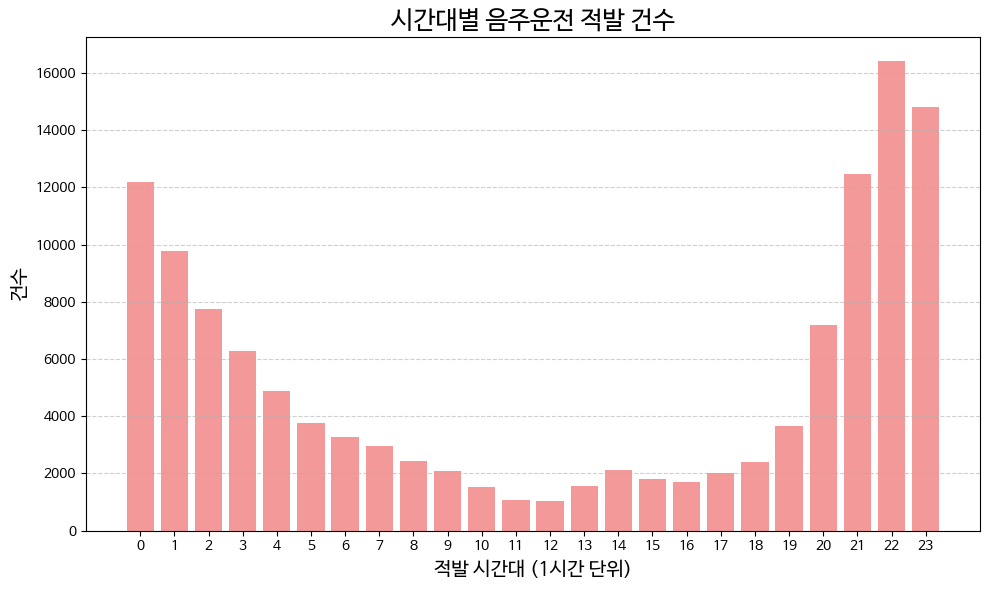

In [ ]:
# 시간대 : 0-23h
df["시간대"] = df["측정일시"].dt.hour

hourly_counts = df["시간대"].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color="lightcoral",alpha=0.8)
plt.xticks(range(0,24))
plt.xlabel("적발 시간대 (1시간 단위)", fontsize=14)
plt.ylabel("건수", fontsize=14)
plt.title("시간대별 음주운전 적발 건수", fontsize=18)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

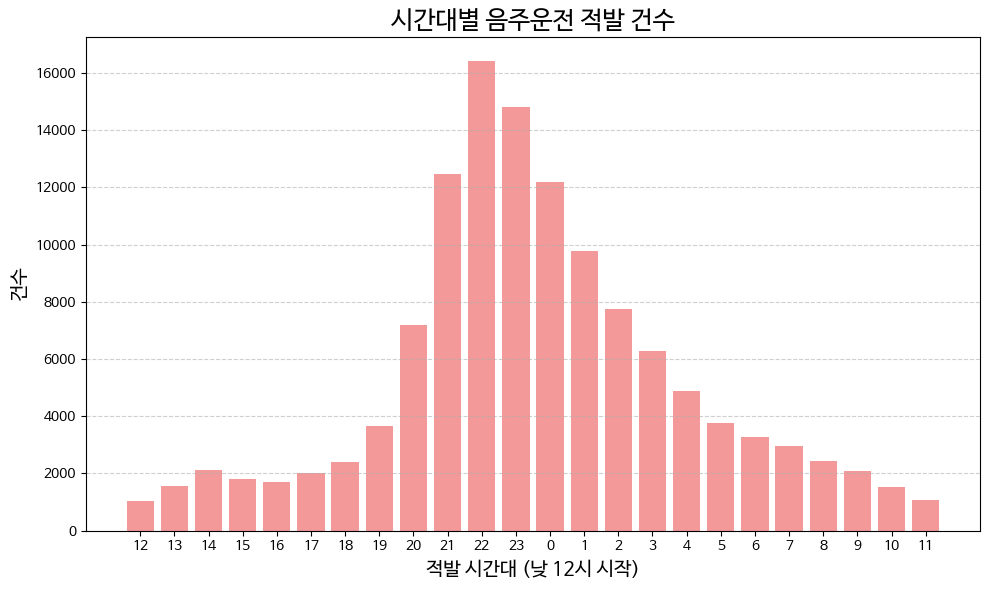

In [ ]:
# 시간대 정렬 : 낮 12시 시작
order = list(range(12, 24)) + list(range(0, 12))
hourly_counts = df["시간대"].value_counts().reindex(order, fill_value=0)

labels = [str(h) for h in order] # 라벨 시간대 정렬

# 시각화
plt.figure(figsize=(10,6))
plt.bar(labels, hourly_counts.values, color="lightcoral",alpha=0.8)
plt.xlabel("적발 시간대 (낮 12시 시작)", fontsize=14)
plt.ylabel("건수", fontsize=14)
plt.title("시간대별 음주운전 적발 건수", fontsize=18)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


* **월별 통계**

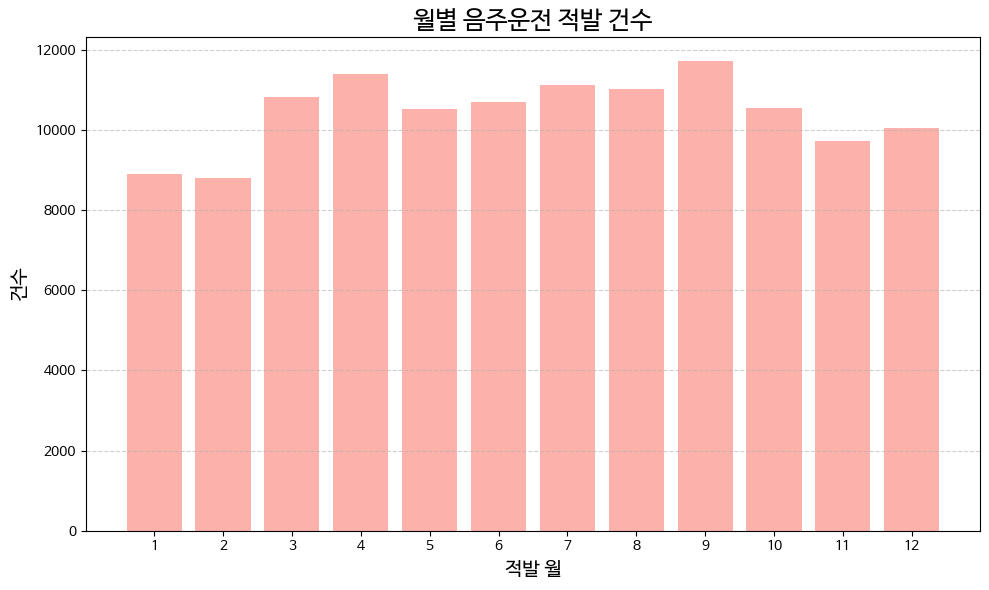

In [ ]:
# 기준: 1월-12월
df["월"] = df["측정일시"].dt.month

monthly_counts = df["월"].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color="salmon",alpha=0.6)
plt.xticks(range(1, 13))
plt.xlabel("적발 월", fontsize=14)
plt.ylabel("건수", fontsize=14)
plt.title("월별 음주운전 적발 건수", fontsize=18)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

* **추가자료 : 음주운전 발생건수**

In [ ]:
import folium
from folium.plugins import MarkerCluster
import json

In [ ]:
# 파일 불러오기
df_map = pd.read_csv("19_23_drunk.csv", encoding="euc-kr")
# reference : https://opendata.koroad.or.kr/api/selectDrunkDataSet.do

In [ ]:
# 지도 중심: 대한민국
center_lat, center_lon = 36.5, 127.8
m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

df_sido = df_map.copy()
df_sido["시도"] = df_sido["시도시군구명"].str.extract(r"^(.+?[시도])") # 서울특별시, 인천광역시, 경기도 etc
sido_grouped = df_sido.groupby("시도")["사고건수"].sum().reset_index()

# GeoJSON file loading
with open("TL_SCCO_CTPRVN.json", encoding="utf-8") as f: # reference: https://yeomss.tistory.com/267
    geo_data = json.load(f)

# 시각화
folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=sido_grouped,
    columns=["시도", "사고건수"],
    key_on="feature.properties.CTP_KOR_NM", # GeoJSON 기준 시도의 이름 키
).add_to(m)

m

In [ ]:
# 지도 중심: 서울
center_lat, center_lon = 37.5665, 126.9780
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

df_seoul = df_map[df_map["시도시군구명"].str.startswith("서울")].copy()
df_seoul["자치구"] = df_seoul["시도시군구명"].str.extract(r"서울특별시\s*(\S+)") # 강남구 강동구 강북구 etc
gu_grouped = df_seoul.groupby("자치구")["사고건수"].sum().reset_index()
gu_grouped["자치구"] = gu_grouped["자치구"].str.replace(r"\d+", "", regex=True) # '강남구1', '강남구10', '강남구11' etc

# preventing mismatching (노원구 결측치)
if "노원구" not in gu_grouped["자치구"].values:
    gu_grouped = pd.concat([
        gu_grouped,
        pd.DataFrame({"자치구": ["노원구"], "사고건수": [0]})
    ], ignore_index=True)

In [ ]:
print(sorted(gu_grouped['자치구'].unique()))
print(sorted({f['properties']['sggnm'] for f in seoul_geo['features']}))

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [ ]:
# GeoJSON file loading
with open("hangjeongdong_서울특별시.geojson", encoding="utf-8") as f:
    seoul_geo = json.load(f)

# 시각화
folium.Choropleth(
    geo_data=seoul_geo,
    name="choropleth",
    data=gu_grouped_valid,
    columns=["자치구", "사고건수"],
    key_on='feature.properties.sggnm', # GeoJSON 기준 시도의 이름 키
).add_to(m)

m